# Introduction - SVM 

SVM is the Supervised Machine Learning algorithm used for both classification, regression. But mostly preferred for classification.

Given a dataset, the algorithm tries to divide the data using hyperplanes and then makes the predictions. SVM is a non-probabilistic linear classifier. While other classifiers, when classifying, predict the probability of a data point to belong to one group or the another, SVM directly says to which group the datapoint belongs to without using any probability calculation.



How it works?
- SVM constructs a best line or the decision boundary called **Hyperplane** which can be used for classification or regression or outlier detection.  The dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane.

- This hyperplane creates 2 margin lines parallel to it which have some distance so that it can distinctly classify the data points. The distance between the 2 margin lines are called **marginal distance**.

- These 2 margin lines passes through the most nearest +ve points and the most nearest -ve points. Those points through which the margin lines pass are called **support vectors**. Support vectors are important as it helps to determine the maximum distance of the marginal plane.
 

## Understanding the Mathematics involved
Let’s take the example of the following dataset and see how can we divide the data into appropriate groups.
<img src='SVM_intution.PNG'  width="300">

We can see that there are two groups of data. The question is how to divide these points into two groups. It can be done using any of the three lines. Or, for that purpose, there can be an infinite number of straight lines that can divide these points into two classes. Now, which line to choose?
SVM solves this problem using the maximum margin as shown 
<img src='SVM_hyperplane.PNG' width="400">


The black line in the middle is the optimum classifier. This line is drawn to maximise the distance of the classifier line from the nearest points in the two classes. It is also called a __hyperplane__ in terms of  SVM. 
A _Hyperplane_ is an n-1 dimensional plane which optimally divides the data of n dimensions. Here, as we have only a 2-D data, so the hyperplane can be represented using one dimension only. Hence, the hyperplane is a line here.
The two points (highlighted with circles) which are on the yellow lines, they are called the __support vectors__. As it is a 2-D figure, they are points. In a multi-dimensional space, they will be vectors, and hence, the name- support vector machine as the algorithm creates the optimum classification line by maximising its distance from the two support vectors.

##### Significance of marginal distance:
![SVM1%20%282%29.png](attachment:SVM1%20%282%29.png)


Which of these lines suits our problem? Observe Fig (i) & (ii), line is close to the data points. So any minor change in the data point might cause this point to fall in to the other class. Whereas in Fig(iii), the line looks more stable as it is far from data points on either side and not susceptible to small changes in data points. Hence hyperplane with the maximum marginal distance is considered to be the best hyperplane.

All three lines, classifies correctly in training data. But the 3rd line will work well with new data too and the rest might have lot of errors.

 - Hence, the optimal hyperplane is the one which is farthest from our training data points ie., the line which has maximum marginal distance. 
 
When the data is not linearly separable,  then to create a hyperplane to separate data into different groups, the SVM algorithm needs to perform computations in a higher-dimensional space. But the introduction of new dimensions makes the computations for the SVMs more intensive, which impacts the algorithm performance. To rectify this, mathematicians came up with the approach of Kernel methods. 
Kernel methods use kernel functions available in mathematics. The unique feature of a kernel function is to compute in a higher-dimensional space without calculating the new coordinates in that higher dimension. It implicitly uses predefined mathematical functions to do operations on the existing points which mimic the computation in a higher-dimensional space without adding to the computation cost as they are not actually calculating the coordinates in the higher dimension thereby avoiding the computation of calculating distances from the newly computed points.  This is called the kernel trick.
<img src= "SVM_3D_Hyperplane.PNG" width="300">
                                                                        Image: bogotobogo.com 


In the left diagram above, we have a non-linear distribution of data as we can not classify a data using a linear equation. To solve this problem, we can project the points in a 3-dimensional space and then derive a plane which divides the data into two parts. In theory, that’s what a kernel function does without computing the additional coordinates for the higher dimension.


## Python Implementation

### Business Case:-To find out based on given features whether the loan will get approved or not

In [ ]:
## Supervised learning with classification task(2 classes)

In [1]:
##importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
## loading the data
data=pd.read_csv('loan_approved.csv')

In [3]:
## Getting the first few rows of data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Domian analysis.

## Basic Checks

In [ ]:
head,tail,info,describe for both numerical and categorical

In [ ]:
data.describe(include='O')

In [ ]:
data.info()

## Exploratory Data Analysis

In [ ]:
# Univariate analysis
# Bivaraite analysis--Autoviz

In [4]:
!pip install autoviz

  Using cached fsspec-0.8.3-py3-none-any.whl (88 kB)


  Attempting uninstall: fsspec
    Found existing installation: fsspec 2022.1.0
    Uninstalling fsspec-2022.1.0:
      Successfully uninstalled fsspec-2022.1.0


In [9]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

AV = AutoViz_Class()

Shape of your Data Set loaded: (614, 13)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    13 Predictors classified...
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 6


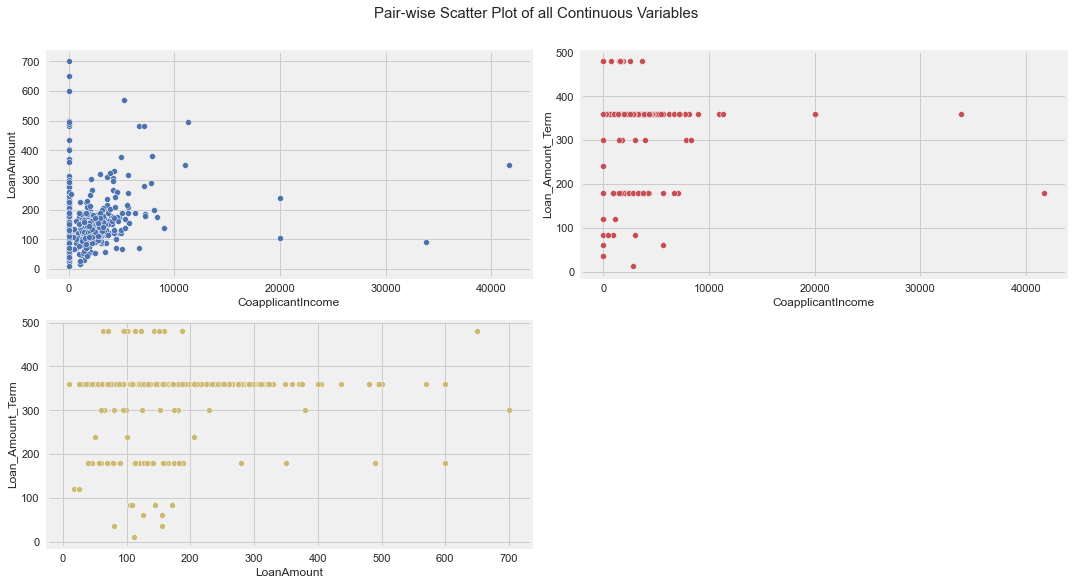

Could not draw Distribution Plot


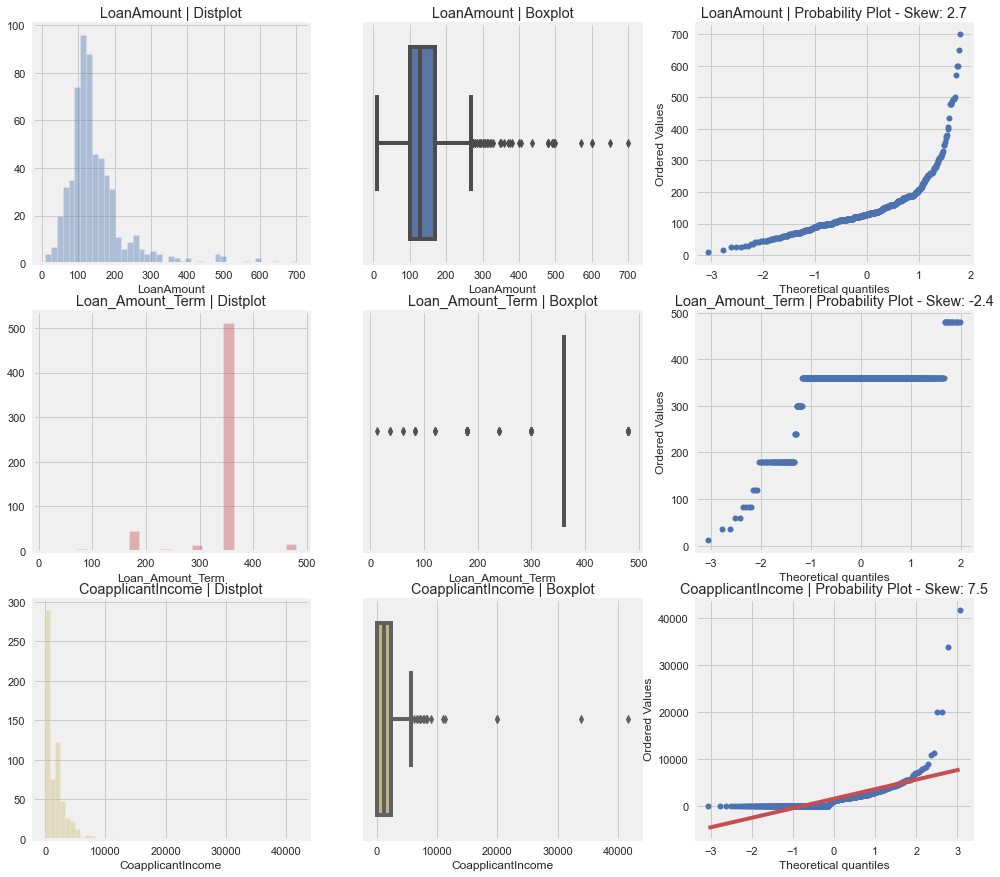

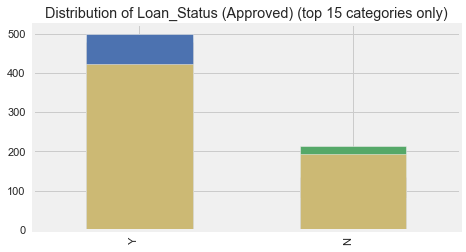

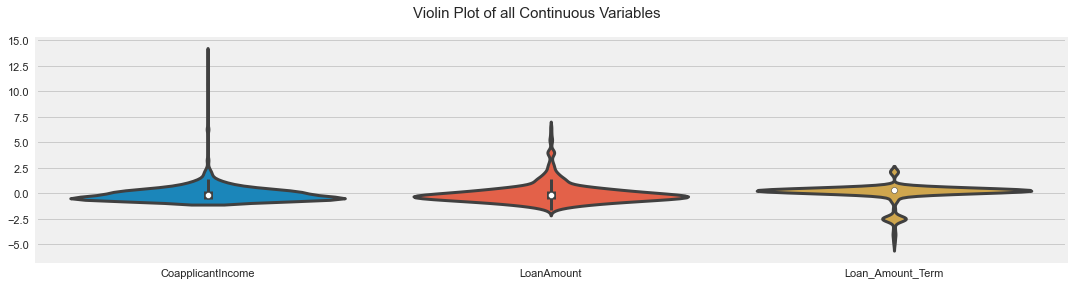

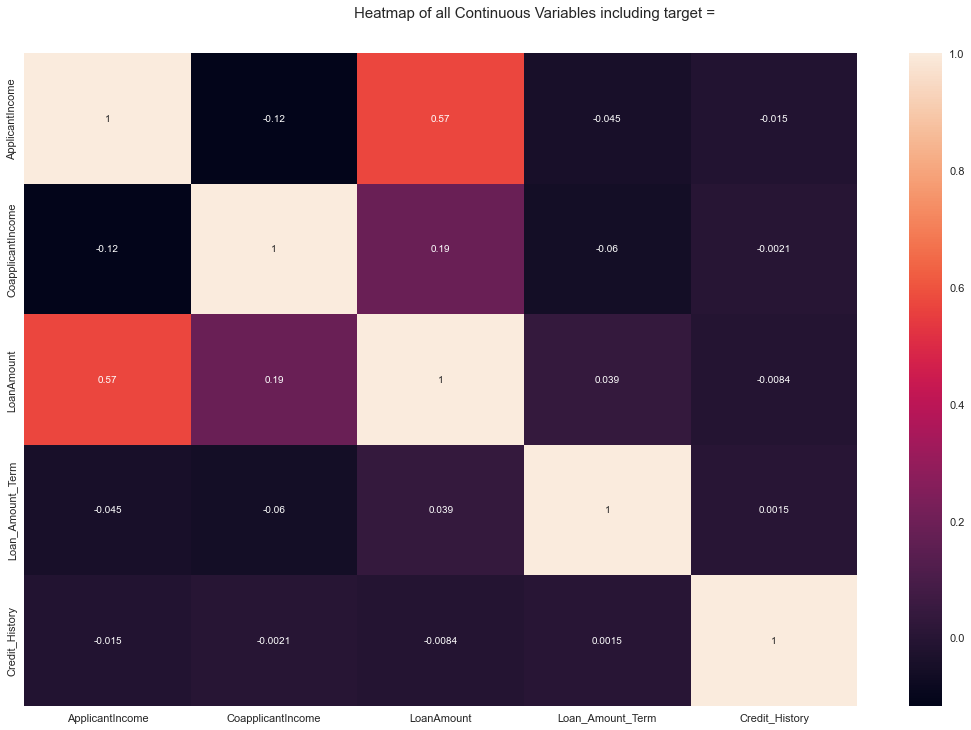

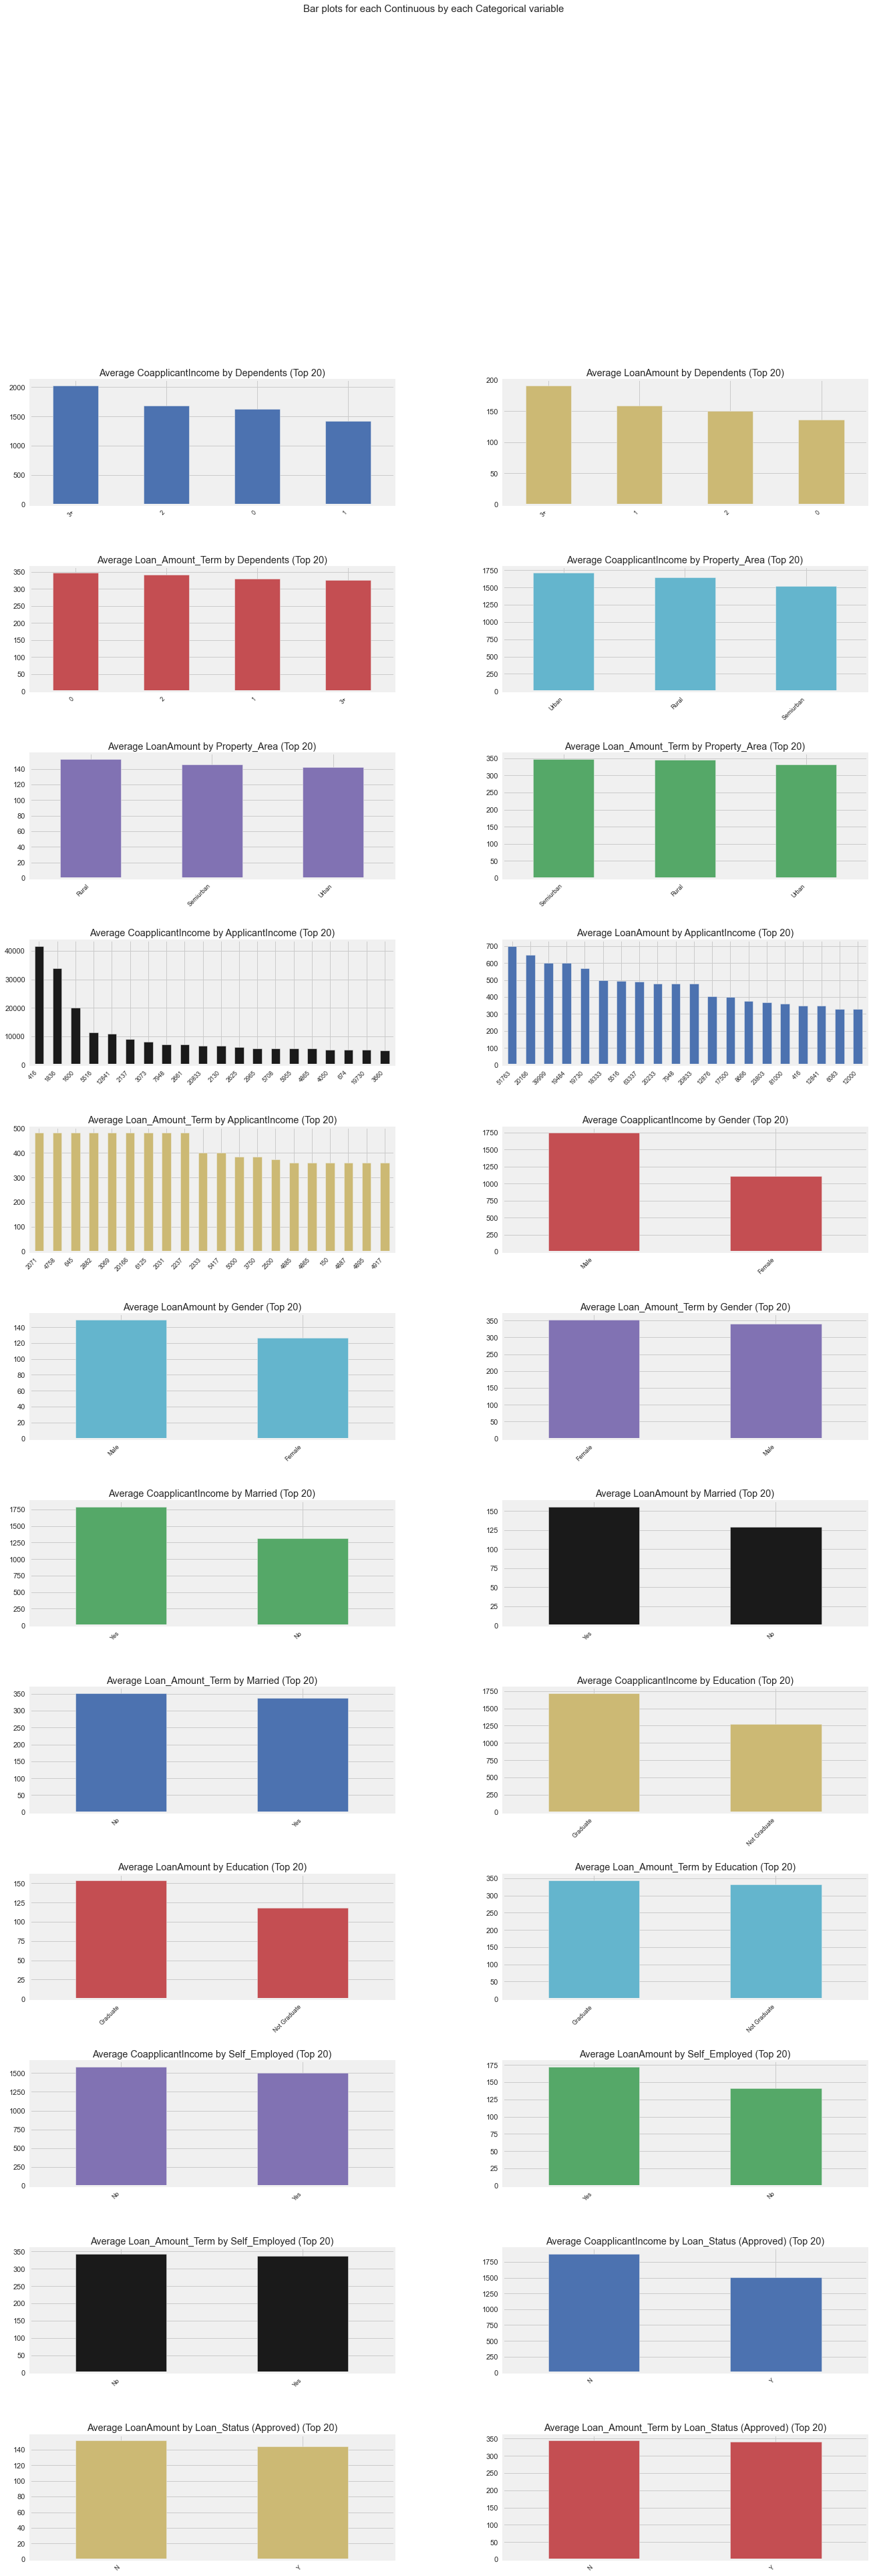

Time to run AutoViz = 11 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [10]:
filename = ""
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=data,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)

In [ ]:
# Task:-Prepare an EDA report on above data.

## Data Preprocessing Pipeline

In [11]:
## Checking missing values

data.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [ ]:
data.shape

In [12]:
## Getting the rows where values are missed in Gender features
data.loc[data['Gender'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [13]:
## Checking the distribution along the both labels
data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [14]:
## How much values have been missed
data.Gender.isnull().sum()/len(data)*100

2.1172638436482085

In [15]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Gender', ylabel='count'>

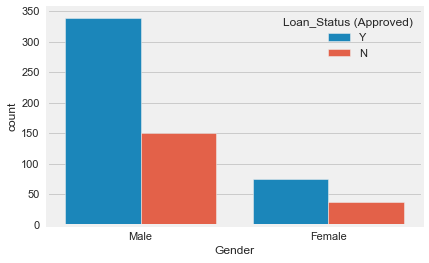

In [17]:
import seaborn as sns

sns.countplot(x='Gender',hue='Loan_Status (Approved)',data=data)

In [28]:
## Imputing the missing values with mode
data.loc[data['Gender'].isnull()==True,'Gender']='Male'

In [ ]:
data.Gender.isnull().sum()

In [ ]:
## Getting the values in Dependents
data.loc[data['Dependents'].isnull()==True]

In [19]:
data.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

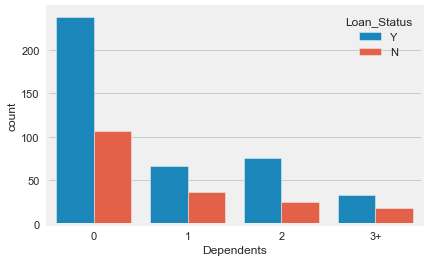

In [21]:
sns.countplot(x='Dependents',data=data,hue='Loan_Status')

In [ ]:
pd.crosstab(data.Dependents,data.Loan_Status)

In [29]:
## renaming the target column
data.rename(columns={"Loan_Status (Approved)":'Loan_Status'},inplace=True)

In [30]:
# From the graphical representation it can be seen that as the number of dependents 
#getting increased,
# the chances of approval is less, since we have missed values and if we approve
# loan for them
# it can turn into major loss(high chance).Hence we will substitue missing values
#by 3+.
data.loc[data['Dependents'].isnull()==True,'Dependents']='3+'

In [ ]:
data

In [ ]:
## For married feature
data.loc[data['Married'].isnull()==True]

<AxesSubplot:xlabel='Married', ylabel='count'>

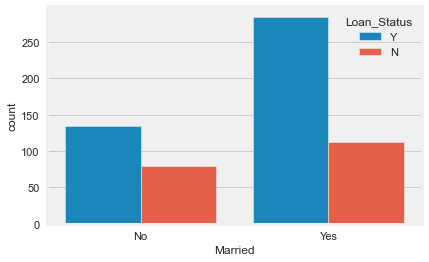

In [23]:
sns.countplot(x='Married',hue='Loan_Status',data=data)

In [ ]:
## getting the counts
data.Married.value_counts()

In [31]:
## Imputing with yes i.e mode
data.loc[data['Married'].isnull()==True,'Married']='Yes'

In [ ]:
## Checking Self_Employed
#data.loc[data['Self_Employed'].isnull()==True]
data.loc[data['Self_Employed']=='No']

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

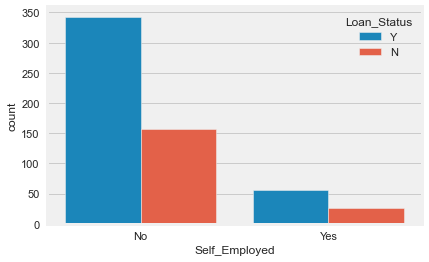

In [25]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=data)

In [ ]:
pd.crosstab(data.Self_Employed,data.Loan_Status)

In [ ]:
data.Self_Employed.value_counts()

In [ ]:
sns.countplot(x='Self_Employed',data=data,hue='Loan_Status')

In [32]:
# Replace the nan values with mode
data.loc[data['Self_Employed'].isnull()==True,'Self_Employed']='No'

In [27]:
# check for null values
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

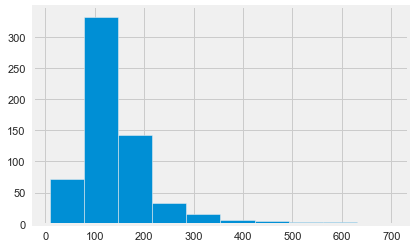

In [36]:
## Histogram since it has numerical value
data.LoanAmount.hist()
plt.show()

Since data is skewed, we can use median to replace the nan value. It is recommended to use mean only for symmetric data distribution.

In [ ]:
# Check median for LoanAmount column
np.median(data.LoanAmount.dropna(axis=0))

In [33]:
# Replace the nan values in LoanAmount column with median value
data.loc[data['LoanAmount'].isnull()==True,'LoanAmount']=np.median(data.LoanAmount.dropna(axis=0))

In [ ]:
data.LoanAmount.isnull().sum()

In [ ]:
## Laon amount term

In [ ]:
data.Loan_Amount_Term.isnull().sum()

In [29]:
data.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [34]:
data.Loan_Amount_Term.median()

360.0

In [ ]:
data.Loan_Amount_Term.hist()

In [34]:
# replace the nan values in Loan_Amount_Term with the median value
data.loc[data['Loan_Amount_Term'].isnull()==True,'Loan_Amount_Term']=np.median(data.Loan_Amount_Term.dropna(axis=0))

In [37]:
# Credit_History
data.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

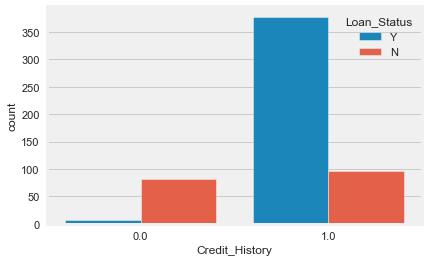

In [38]:
sns.countplot(x='Credit_History',data=data,hue='Loan_Status')

In [35]:
data.loc[data['Credit_History'].isnull()==True,'Credit_History']=1.0

In [36]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
## Step 2 Handling the categorical data
data.info()

In [37]:
## Using label encoder to convert the categorical data to numerical data

from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

data.Gender=lc.fit_transform(data.Gender)
data.Married=lc.fit_transform(data.Married)
data.Education=lc.fit_transform(data.Education)
data.Property_Area=lc.fit_transform(data.Property_Area)
data.Loan_Status=lc.fit_transform(data.Loan_Status)
data.Dependents=lc.fit_transform(data.Dependents)
data.Self_Employed=lc.fit_transform(data.Self_Employed)

In [14]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [26]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
## One hot encoding
df1=pd.get_dummies(data['Gender'],prefix='Gender',drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['Gender'],axis=1)

In [23]:
df1

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
609,1,0
610,0,1
611,0,1
612,0,1


In [25]:
df1

,Gender_Male
0,1
1,1
2,1
3,1
4,1
...,...
609,0
610,1
611,1
612,1


In [18]:
data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
data.Loan_Amount_Term.value_counts()

In [38]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [40]:
## scaling data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]=scale.fit_transform(data[['ApplicantIncome','CoapplicantIncome',
                          'LoanAmount']])



In [ ]:
X=5849
Xmin=150
Xmax=81000

In [ ]:
X_scale=X-Xmin/Xmax-Xmin
5849-150/81000-150

In [42]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.817590,0.218241,0.133550,0.064978,0.038910,0.197905,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.060618,0.413389,0.340446,0.075560,0.070229,0.121718,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.033735,0.000000,0.132055,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.045300,0.028524,0.172214,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,0.069821,0.055134,0.225398,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,480.000000,1.000000,2.000000,1.000000


In [ ]:
#Outlier check -->Once we see the performance of classifier on that basis we will check for outlier.

In [45]:
## checking the duplicate rows

#data.duplicate()
data.duplicated().sum()

0

## Feature Selection

In [ ]:
# Removing redundant columns
We can drop loan id.

In [43]:
## checking correlation
corr_data=data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

<AxesSubplot:>

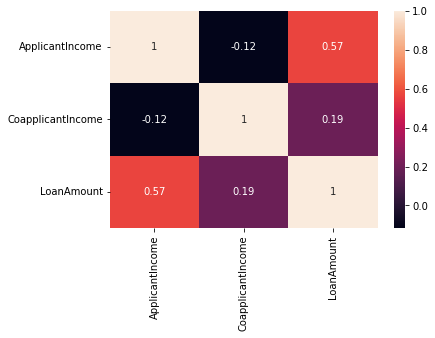

In [44]:
sns.heatmap(corr_data.corr(),annot=True)

In [ ]:
## There is no relationship among the numerical data 

In [ ]:
corr_data.describe() ## no constant features

## Model Creation

In [46]:
data.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,0.070489,0.0,0.172214,360.0,1.0,2,1


In [47]:
## defining X and y
X=data.iloc[:,1:-1]
y=data.Loan_Status

In [ ]:
X

In [48]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=3)

In [49]:
## balancing the data
data.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [50]:
# Install imblearn package - pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [51]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

**Counter** is a container which keeps track to how many times equivalent values are added. Python counter class is a part of collections module and is a subclass of dictionary.

In [52]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({1: 301, 0: 159})
SMOTE Classes Counter({1: 301, 0: 301})


In [53]:
# Support Vector Classifier Model

from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_smote, y_smote)

SVC()

In [54]:
# Predict output for X_test

y_hat=svclassifier.predict(X_test)

In [56]:
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.7922077922077922

In [58]:
y_hat_training=svclassifier.predict(X_train)

In [57]:
# Calssification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives 
# are used to predict the metrics of a classification report 

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.67      0.06      0.11        33
           1       0.79      0.99      0.88       121

    accuracy                           0.79       154
   macro avg       0.73      0.53      0.50       154
weighted avg       0.77      0.79      0.72       154



In [59]:
print(classification_report(y_train,y_hat_training))

              precision    recall  f1-score   support

           0       0.58      0.04      0.08       159
           1       0.66      0.98      0.79       301

    accuracy                           0.66       460
   macro avg       0.62      0.51      0.44       460
weighted avg       0.63      0.66      0.55       460



In [ ]:
cm1=pd.crosstab(y_test,y_hat)
cm1

In [61]:
# F1 score considers both Precision and Recall for evaluating a model
f1=f1_score(y_test,y_hat)
f1

0.8823529411764707

In [60]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,X,y,cv=3,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.8150289  0.8150289  0.81395349]
Cross validation Score: 0.8146704306134337
Std : 0.0005069547205710685


## What is a Model Hyperparameter?

A model hyperparameter is a configuration that is external to the model and whose value cannot be estimated from data.



## Hyperparameters of Support Vector Machine

#### SVM separates data points that belong to different classes with a decision boundary. When determining the decision boundary, a soft margin SVM (soft margin means allowing some data points to be misclassified) tries to solve an optimization problem with the following goals:

#### 1)Increase the distance of decision boundary to classes (or support vectors)
#### 2)Maximize the number of points that are correctly classified in the training set

### There is obviously a trade-off between these two goals which and it is controlled by C which adds a penalty for each misclassified data point.

### If C is small, the penalty for misclassified points is low so a decision boundary with a large margin is chosen at the expense of a greater number of misclassification.

### If C is large, SVM tries to minimize the number of misclassified examples due to the high penalty which results in a decision boundary with a smaller margin. The penalty is not the same for all misclassified examples. It is directly proportional to the distance to the decision boundary.

<img src='1_XFtyzSNjexMecQ4wmqBfgA.PNG'  width="300">

<img src='1_k4wh7vzjDbQWXx7wKyH0kg.PNG'  width="600">



### Gamma is a hyperparameter used with non-linear SVM. One of the most commonly used non-linear kernels is the radial basis function (RBF). Gamma parameter of RBF controls the distance of the influence of a single training point.

### Low values of gamma indicate a large similarity radius which results in more points being grouped together. 

### For high values of gamma, the points need to be very close to each other in order to be considered in the same group (or class). Therefore, models with very large gamma values tend to overfit.

<img src='1_JDSwT-svWnAu69fy9oguBw.png' width="600">


<img src='1_faj7x1I0uFwfU6mkLfUwvg.png' width="600">

<img src='1_5DtPKUzLI1e-FIjC-odFiw.png' width="600">

## GridSearchCV

#### It is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters

#### Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.

#### GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

In [67]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'random_state':(list(range(1, 20)))} 
model=SVC()
grid = GridSearchCV(model, param_grid, refit = True, verbose = 2,scoring='f1',cv=5)
  
# fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 475 candidates, totalling 2375 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1,

[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C

[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0

[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.

[CV] END ......................C=1, gamma=1, random_state=13; total time=   0.0s
[CV] END ......................C=1, gamma=1, random_state=13; total time=   0.0s
[CV] END ......................C=1, gamma=1, random_state=13; total time=   0.0s
[CV] END ......................C=1, gamma=1, random_state=14; total time=   0.0s
[CV] END ......................C=1, gamma=1, random_state=14; total time=   0.0s
[CV] END ......................C=1, gamma=1, random_state=14; total time=   0.0s
[CV] END ......................C=1, gamma=1, random_state=14; total time=   0.0s
[CV] END ......................C=1, gamma=1, random_state=14; total time=   0.0s
[CV] END ......................C=1, gamma=1, random_state=15; total time=   0.0s
[CV] END ......................C=1, gamma=1, random_state=15; total time=   0.0s
[CV] END ......................C=1, gamma=1, random_state=15; total time=   0.0s
[CV] END ......................C=1, gamma=1, random_state=15; total time=   0.0s
[CV] END ...................

[CV] END ....................C=1, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=1, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=1, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=1, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ....................C=1, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ....................C=1, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ....................C=1, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ....................C=1, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ....................C=1, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ....................C=1, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ....................C=1, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ....................C=1, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................

[CV] END ...................C=1, gamma=0.01, random_state=17; total time=   0.1s
[CV] END ...................C=1, gamma=0.01, random_state=17; total time=   0.1s
[CV] END ...................C=1, gamma=0.01, random_state=17; total time=   0.1s
[CV] END ...................C=1, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ...................C=1, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ...................C=1, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ...................C=1, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ...................C=1, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ...................C=1, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ...................C=1, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ...................C=1, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ...................C=1, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ...................

[CV] END ..................C=1, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ..................C

[CV] END ......................C=10, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ...................

[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................

[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=

[CV] END ................C=10, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=1

[CV] END ....................C=100, gamma=1, random_state=11; total time=   0.1s
[CV] END ....................C=100, gamma=1, random_state=11; total time=   0.1s
[CV] END ....................C=100, gamma=1, random_state=11; total time=   0.1s
[CV] END ....................C=100, gamma=1, random_state=12; total time=   0.1s
[CV] END ....................C=100, gamma=1, random_state=12; total time=   0.0s
[CV] END ....................C=100, gamma=1, random_state=12; total time=   0.1s
[CV] END ....................C=100, gamma=1, random_state=12; total time=   0.1s
[CV] END ....................C=100, gamma=1, random_state=12; total time=   0.1s
[CV] END ....................C=100, gamma=1, random_state=13; total time=   0.1s
[CV] END ....................C=100, gamma=1, random_state=13; total time=   0.1s
[CV] END ....................C=100, gamma=1, random_state=13; total time=   0.1s
[CV] END ....................C=100, gamma=1, random_state=13; total time=   0.1s
[CV] END ...................

[CV] END ..................C=100, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ..................C=100, gamma=0.1, random_state=13; total time=   0.1s
[CV] END ..................C=100, gamma=0.1, random_state=13; total time=   0.1s
[CV] END ..................C=100, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ..................C=100, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ..................C=100, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ..................C=100, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ..................C=100, gamma=0.1, random_state=14; total time=   0.1s
[CV] END ..................C=100, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ..................C=100, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ..................C=100, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ..................C=100, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ..................C

[CV] END .................C=100, gamma=0.01, random_state=14; total time=   0.1s
[CV] END .................C=100, gamma=0.01, random_state=14; total time=   0.0s
[CV] END .................C=100, gamma=0.01, random_state=15; total time=   0.0s
[CV] END .................C=100, gamma=0.01, random_state=15; total time=   0.0s
[CV] END .................C=100, gamma=0.01, random_state=15; total time=   0.1s
[CV] END .................C=100, gamma=0.01, random_state=15; total time=   0.1s
[CV] END .................C=100, gamma=0.01, random_state=15; total time=   0.0s
[CV] END .................C=100, gamma=0.01, random_state=16; total time=   0.0s
[CV] END .................C=100, gamma=0.01, random_state=16; total time=   0.1s
[CV] END .................C=100, gamma=0.01, random_state=16; total time=   0.1s
[CV] END .................C=100, gamma=0.01, random_state=16; total time=   0.1s
[CV] END .................C=100, gamma=0.01, random_state=16; total time=   0.0s
[CV] END .................C=

[CV] END ................C=100, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ................C=100, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ................C=100, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ................C=100, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ................C=100, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ................C=100, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ................C=100, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ................C=100, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ................C=100, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ................C=100, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ................C=100, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ................C=100, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ................C=1

[CV] END ...............C=100, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ...............C=100, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ...............C=100, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ...............C=100, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ...............C=100, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ...............C=100, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ...............C=100, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ...............C=100, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ....................C=1000, gamma=1, random_state=1; total time=   0.0s
[CV] END ....................C=1000, gamma=1, random_state=1; total time=   0.0s
[CV] END ....................C=1000, gamma=1, random_state=1; total time=   0.1s
[CV] END ....................C=1000, gamma=1, random_state=1; total time=   0.0s
[CV] END ...................

[CV] END ..................C=1000, gamma=0.1, random_state=1; total time=   0.1s
[CV] END ..................C=1000, gamma=0.1, random_state=1; total time=   0.2s
[CV] END ..................C=1000, gamma=0.1, random_state=1; total time=   0.1s
[CV] END ..................C=1000, gamma=0.1, random_state=1; total time=   0.1s
[CV] END ..................C=1000, gamma=0.1, random_state=2; total time=   0.2s
[CV] END ..................C=1000, gamma=0.1, random_state=2; total time=   0.1s
[CV] END ..................C=1000, gamma=0.1, random_state=2; total time=   0.2s
[CV] END ..................C=1000, gamma=0.1, random_state=2; total time=   0.1s
[CV] END ..................C=1000, gamma=0.1, random_state=2; total time=   0.1s
[CV] END ..................C=1000, gamma=0.1, random_state=3; total time=   0.1s
[CV] END ..................C=1000, gamma=0.1, random_state=3; total time=   0.1s
[CV] END ..................C=1000, gamma=0.1, random_state=3; total time=   0.1s
[CV] END ..................C

[CV] END .................C=1000, gamma=0.01, random_state=2; total time=   0.1s
[CV] END .................C=1000, gamma=0.01, random_state=2; total time=   0.1s
[CV] END .................C=1000, gamma=0.01, random_state=3; total time=   0.1s
[CV] END .................C=1000, gamma=0.01, random_state=3; total time=   0.1s
[CV] END .................C=1000, gamma=0.01, random_state=3; total time=   0.1s
[CV] END .................C=1000, gamma=0.01, random_state=3; total time=   0.1s
[CV] END .................C=1000, gamma=0.01, random_state=3; total time=   0.1s
[CV] END .................C=1000, gamma=0.01, random_state=4; total time=   0.1s
[CV] END .................C=1000, gamma=0.01, random_state=4; total time=   0.1s
[CV] END .................C=1000, gamma=0.01, random_state=4; total time=   0.1s
[CV] END .................C=1000, gamma=0.01, random_state=4; total time=   0.1s
[CV] END .................C=1000, gamma=0.01, random_state=4; total time=   0.1s
[CV] END .................C=

[CV] END ................C=1000, gamma=0.001, random_state=4; total time=   0.1s
[CV] END ................C=1000, gamma=0.001, random_state=4; total time=   0.1s
[CV] END ................C=1000, gamma=0.001, random_state=4; total time=   0.1s
[CV] END ................C=1000, gamma=0.001, random_state=4; total time=   0.1s
[CV] END ................C=1000, gamma=0.001, random_state=5; total time=   0.1s
[CV] END ................C=1000, gamma=0.001, random_state=5; total time=   0.1s
[CV] END ................C=1000, gamma=0.001, random_state=5; total time=   0.1s
[CV] END ................C=1000, gamma=0.001, random_state=5; total time=   0.1s
[CV] END ................C=1000, gamma=0.001, random_state=5; total time=   0.1s
[CV] END ................C=1000, gamma=0.001, random_state=6; total time=   0.1s
[CV] END ................C=1000, gamma=0.001, random_state=6; total time=   0.1s
[CV] END ................C=1000, gamma=0.001, random_state=6; total time=   0.1s
[CV] END ................C=1

[CV] END ...............C=1000, gamma=0.0001, random_state=6; total time=   0.1s
[CV] END ...............C=1000, gamma=0.0001, random_state=6; total time=   0.1s
[CV] END ...............C=1000, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ...............C=1000, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ...............C=1000, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ...............C=1000, gamma=0.0001, random_state=7; total time=   0.1s
[CV] END ...............C=1000, gamma=0.0001, random_state=7; total time=   0.1s
[CV] END ...............C=1000, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ...............C=1000, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ...............C=1000, gamma=0.0001, random_state=8; total time=   0.1s
[CV] END ...............C=1000, gamma=0.0001, random_state=8; total time=   0.1s
[CV] END ...............C=1000, gamma=0.0001, random_state=8; total time=   0.1s
[CV] END ...............C=10

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [68]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
#print(grid.best_estimator_)

{'C': 1, 'gamma': 0.1, 'random_state': 1}


In [69]:
#clf=SVC(C=100, gamma=0.001,random_state=42) ##0.1
clf=SVC(C=1, gamma=0.1,random_state=1) ##0.1

In [70]:
clf.fit(X_smote, y_smote)

SVC(C=1, gamma=0.1, random_state=1)

In [71]:
y_clf=clf.predict(X_test)

In [72]:
print(classification_report(y_test,y_clf))

              precision    recall  f1-score   support

           0       0.71      0.36      0.48        33
           1       0.85      0.96      0.90       121

    accuracy                           0.83       154
   macro avg       0.78      0.66      0.69       154
weighted avg       0.82      0.83      0.81       154



In [ ]:
cm=pd.crosstab(y_test,y_clf)
cm

In [73]:
f1=f1_score(y_test,y_clf)
f1

0.8992248062015504

In [ ]:
scores_after = cross_val_score(clf,X,y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

# If you can see f1 score is improved however the recall is still lagging.

# Task:-Change the all preprocessing technqiue and try to see if performance can be improved for not.

# We still have ot gone through feature selection technqiue.
